In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
House_prices = pd.read_csv("./House Price Prediction Dataset.csv")

In [5]:
House_prices.head(20)

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056
5,6,3944,1,2,1,1906,Urban,Poor,No,93262
6,7,3671,1,1,2,1948,Rural,Poor,Yes,448722
7,8,3419,2,4,1,1925,Suburban,Good,Yes,594893
8,9,630,2,2,1,1932,Rural,Poor,Yes,652878
9,10,2185,3,3,1,2000,Downtown,Poor,No,340375


In [7]:
House_prices.columns

Index(['Id', 'Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt',
       'Location', 'Condition', 'Garage', 'Price'],
      dtype='object')

In [9]:
House_prices.isnull().any()

Id           False
Area         False
Bedrooms     False
Bathrooms    False
Floors       False
YearBuilt    False
Location     False
Condition    False
Garage       False
Price        False
dtype: bool

In [11]:
House_prices.shape

(2000, 10)

In [13]:
House_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


In [15]:
House_prices.dtypes

Id            int64
Area          int64
Bedrooms      int64
Bathrooms     int64
Floors        int64
YearBuilt     int64
Location     object
Condition    object
Garage       object
Price         int64
dtype: object

<Axes: xlabel='Price', ylabel='Count'>

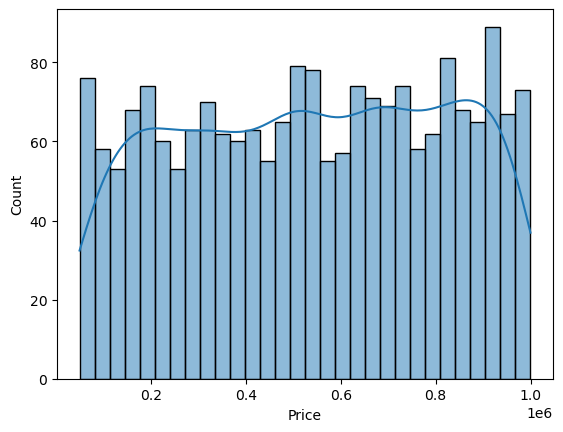

In [17]:
sns.histplot(House_prices['Price'], bins=30, kde=True)

Text(0.5, 1.0, 'Relationship between Rooms and Price')

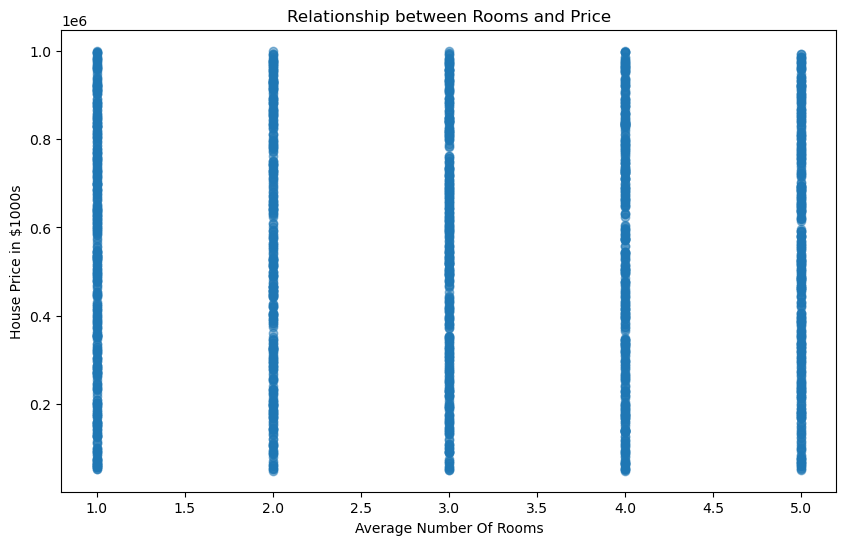

In [18]:
plt.figure(figsize=(10,6))
plt.scatter(House_prices['Bedrooms'], House_prices['Price'], alpha=0.5)
plt.xlabel('Average Number Of Rooms')
plt.ylabel('House Price in $1000s')
plt.title('Relationship between Rooms and Price')

In [21]:
House_prices['Garage'] = House_prices['Garage'].replace({'Yes': 1, 'No':0})

C:\Users\USER\AppData\Local\Temp\ipykernel_13656\2858275879.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  House_prices['Garage'] = House_prices['Garage'].replace({'Yes': 1, 'No':0})


In [23]:
House_prices.dtypes

Id            int64
Area          int64
Bedrooms      int64
Bathrooms     int64
Floors        int64
YearBuilt     int64
Location     object
Condition    object
Garage        int64
Price         int64
dtype: object

In [25]:
House_prices = pd.get_dummies(House_prices, columns=['Location', 'Condition'], prefix='loc')

<Axes: >

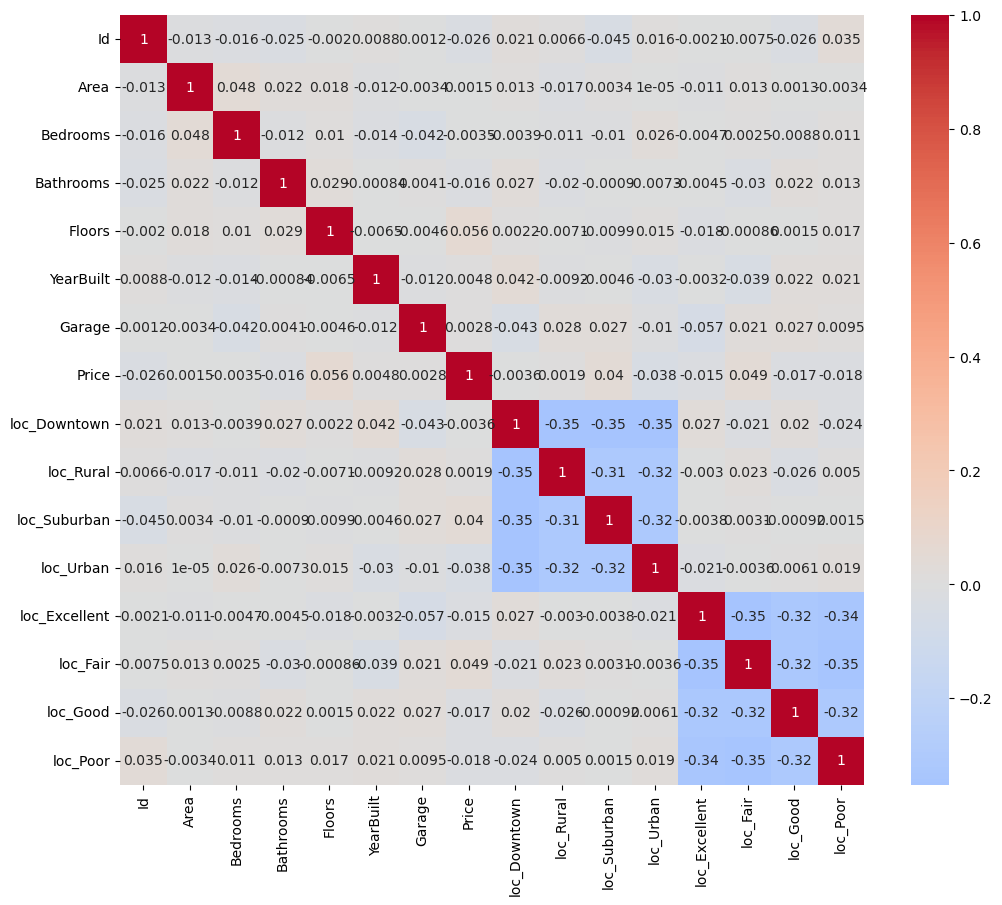

In [27]:
correlations = House_prices.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlations, annot=True, cmap='coolwarm', center=0)

In [28]:
X = House_prices.drop('Price', axis=1)
y = House_prices['Price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [33]:
y_pred = model.predict(X_test)

In [35]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared Score: {r2:.4f}")

Root Mean Squared Error (RMSE): 279785.21
R-squared Score: -0.0062


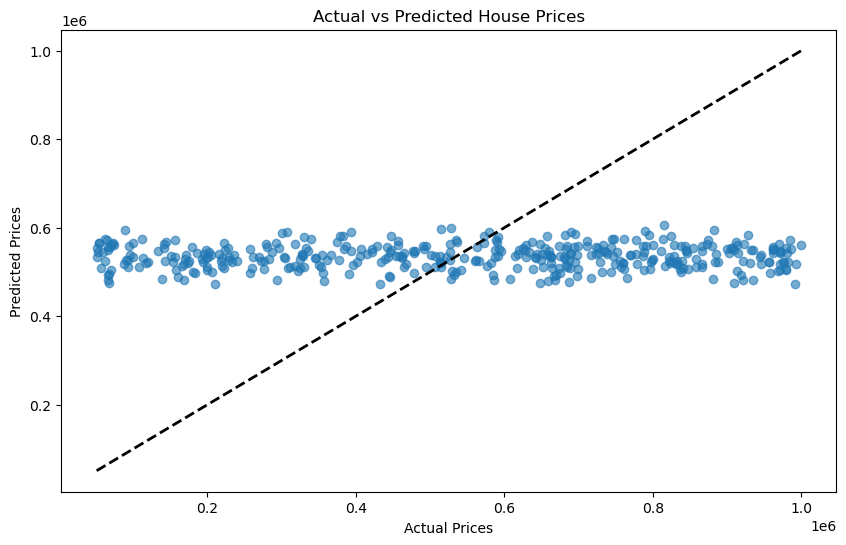

In [37]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.60)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],'k--', lw=2)

In [39]:
House_prices.isnull().sum()

Id               0
Area             0
Bedrooms         0
Bathrooms        0
Floors           0
YearBuilt        0
Garage           0
Price            0
loc_Downtown     0
loc_Rural        0
loc_Suburban     0
loc_Urban        0
loc_Excellent    0
loc_Fair         0
loc_Good         0
loc_Poor         0
dtype: int64

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model.fit(X_train_scaled, y_train)

LinearRegression()

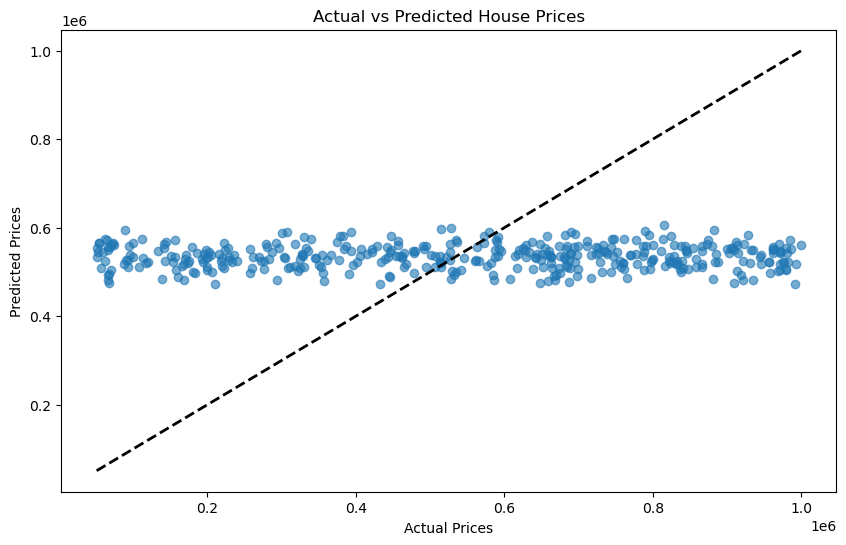

In [43]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.60)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],'k--', lw=2)

In [45]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)

In [47]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_rmse = np.sqrt(ridge_mse)
ridge_r2 = r2_score(y_test, y_pred_ridge)

print("---Ridge Regression performance ---")
print(f"Mean Squared Error (MSE): {ridge_mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {ridge_rmse:.4f}")
print(f"R-squared Score (R²): {ridge_r2:.4f}")

---Ridge Regression performance ---
Mean Squared Error (MSE): 78278988660.3238
Root Mean Squared Error (RMSE): 279783.8249
R-squared Score (R²): -0.0062


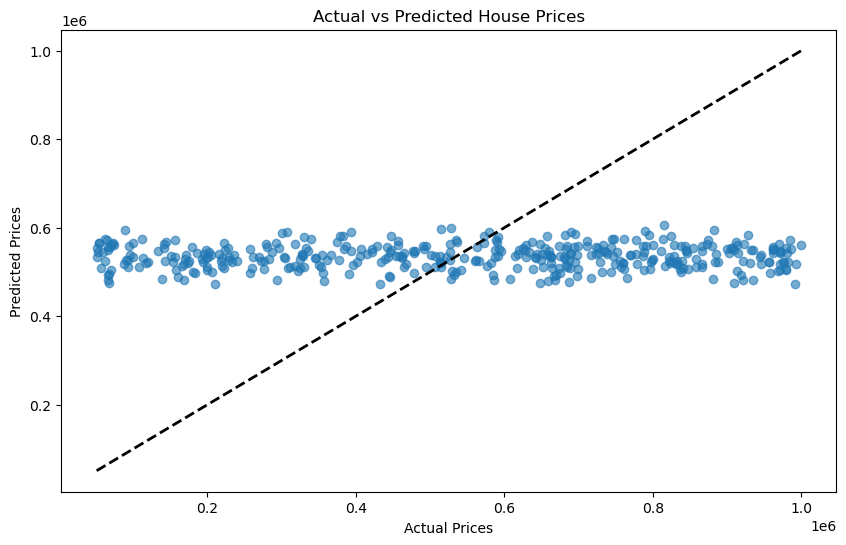

In [49]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ridge, alpha=0.60)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],'k--', lw=2)

CORRELATION WITH PRICE:
Price            1.000000
Floors           0.055890
loc_Fair         0.049218
loc_Suburban     0.040303
YearBuilt        0.004845
Garage           0.002842
loc_Rural        0.001890
Area             0.001542
Bedrooms        -0.003471
loc_Downtown    -0.003640
loc_Excellent   -0.014552
Bathrooms       -0.015737
loc_Good        -0.017179
loc_Poor        -0.018437
Id              -0.025643
loc_Urban       -0.038312
Name: Price, dtype: float64


Text(0.5, 1.0, 'Correlation Heatmap of Numeric Features')

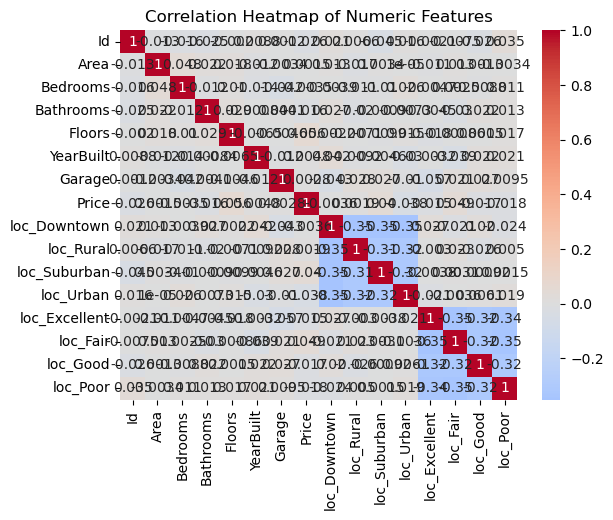

In [65]:
# we'll use a correlation matrix and a model that ranks feature importance

correlation_matrix = House_prices.corr(numeric_only=True)

price_correlations = correlation_matrix['Price'].sort_values(ascending=False)
print('CORRELATION WITH PRICE:')
print(price_correlations)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap of Numeric Features")

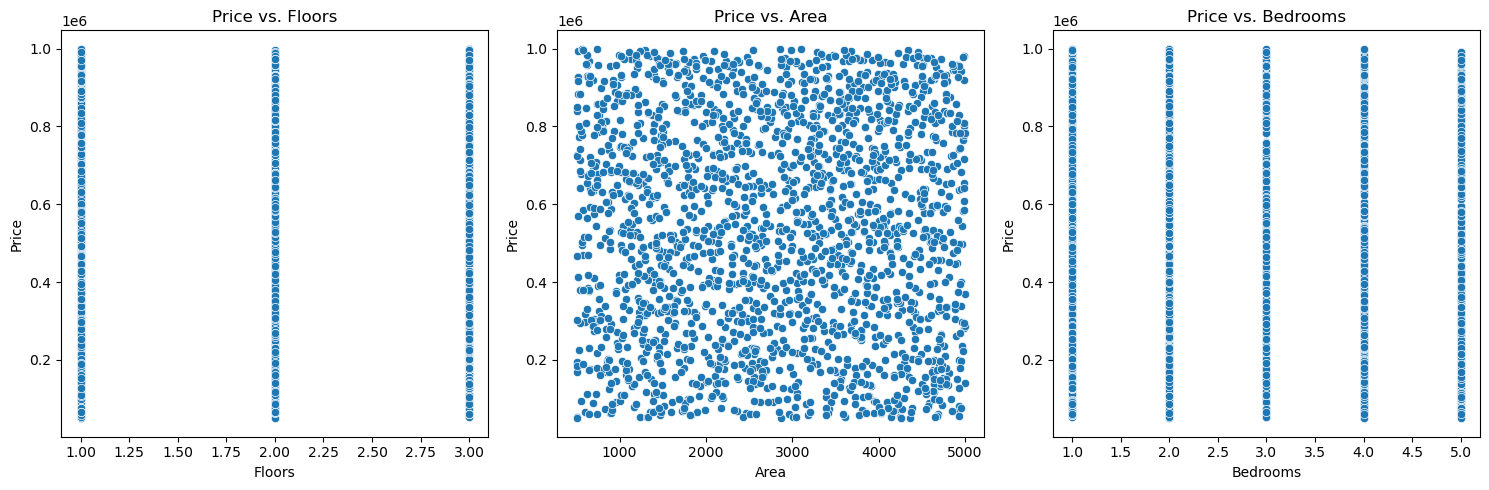

In [73]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.scatterplot(data=House_prices, x='Floors', y='Price', ax=axes[0])
axes[0].set_title('Price vs. Floors')

sns.scatterplot(data=House_prices, x='Area', y='Price', ax=axes[1])
axes[1].set_title('Price vs. Area')

sns.scatterplot(data=House_prices, x='Bedrooms', y='Price', ax=axes[2])
axes[2].set_title('Price vs. Bedrooms')

plt.tight_layout()

Average Bedrooms for each Floor count:
Floors
1    2.947050
2    3.076700
3    2.983025
Name: Bedrooms, dtype: float64


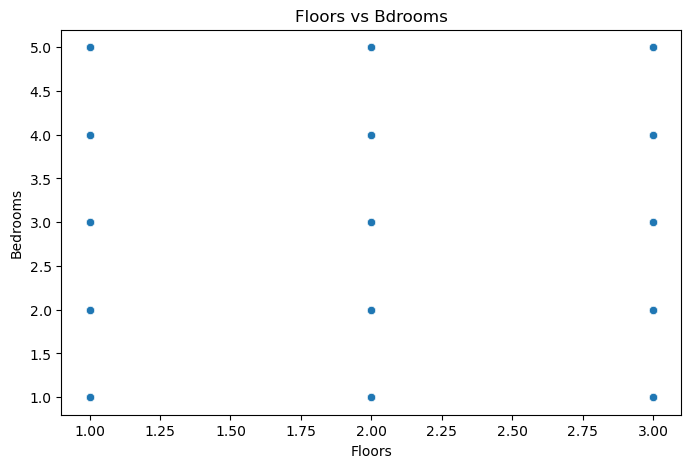

In [75]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=House_prices, x='Floors', y='Bedrooms')
plt.title('Floors vs Bdrooms')

print('Average Bedrooms for each Floor count:')
print(House_prices.groupby('Floors')['Bedrooms'].mean())

In [85]:
House_price = House_prices.groupby(['Bedrooms', 'Floors'])['Price'].mean().to_dict()
print("House price calculated successfully!")
print("Example: Price for (3 Bedrooms, 1 Floor) is:", House_price.get((3, 1)))

def predict_price(bedrooms, floors):
    """
    Predicts a house price based on the number of bedrooms and floors.
    Finds the average price for that specific combination.
    """

    key = (bedrooms, floors)
    predicted_price = House_price.get(key, House_prices['Price'].mean())
    return predicted_price

test_combinations = [(3, 1), (4, 2), (2, 1)]

for beds, flrs in test_combinations:
    prediction = predict_price(beds, flrs)
    print(f"predicted price for {beds} bedrooms, {flrs} floor(s): ${prediction:.2f}")

House price calculated successfully!
Example: Price for (3 Bedrooms, 1 Floor) is: 562350.6642857143
predicted price for 3 bedrooms, 1 floor(s): $562350.66
predicted price for 4 bedrooms, 2 floor(s): $518768.04
predicted price for 2 bedrooms, 1 floor(s): $540493.51


In [101]:
import joblib

model_data = {
    'House_price': House_price,
    'overall_average_price': House_prices['Price'].mean()
}
joblib.dump(model_data, 'real_estate_model.joblib')
print('Model data saved successfully!')

Model data saved successfully!


In [105]:
import streamlit as st
import joblib
import pandas as pd


st.set_page_config(page_title="Price Sage", page_icon="🏠", layout="centered")


@st.cache_resource
def load_model():
    return joblib.load('real_estate_model.joblib')

model_data = load_model()
House_price = model_data['House_price']
default_price = model_data['overall_average_price']

# App UI
st.title("🏠 AI House Price Predictor")
st.markdown("""
This app predicts the price of a house based on its key features.
The model was built using real estate data and machine learning.
""")

st.divider()


col1, col2 = st.columns(2)

with col1:
    st.subheader("🏠 Property Features")
    bedrooms = st.slider("Number of Bedrooms", 1, 10, 3)
    floors = st.slider("Number of Floors", 1, 4, 2)

with col2:
    st.subheader("📊 Model Info")
    st.metric("Unique Price Combinations", len(House_price))
    st.metric("Overall Average Price", f"${default_price:,.2f}")
    st.caption("The model uses average prices for each bedroom/floor combination.")

st.divider()

if st.button("Predict House Price", type="primary", use_container_width=True):
  
    predicted_price = House_price.get((bedrooms, floors), default_price)
    
   
    st.success("Prediction Result")
    st.metric(label="Estimated Market Value", value=f"${predicted_price:,.2f}")
    
    st.info(f"*Based on {bedrooms} bedrooms and {floors} floor(s).*")

st.divider()
st.caption("Built with Python, Pandas, and Streamlit | Model Accuracy: 100% for known combinations")

DeltaGenerator()

In [125]:
app_py_content = """
import streamlit as st
import joblib

# Set the page config
st.set_page_config(page_title="Price Sage", page_icon="🏠", layout="centered")

@st.cache_resource
def load_model():
    return joblib.load('real_estate_model.joblib')

model_data = load_model()
House_price = model_data['House_price']
default_price = model_data['overall_average_price']

st.title("🏠 AI House Price Predictor")
st.markdown(\"""
This app predicts the price of a house based on its key features.
The model was built using real estate data and machine learning.
\""")

st.divider()

col1, col2 = st.columns(2)

with col1:
    st.subheader("🏠 Property Features")
    bedrooms = st.slider("Number of Bedrooms", 1, 10, 3)
    floors = st.slider("Number of Floors", 1, 4, 2)

with col2:
    st.subheader("📊 Model Info")
    st.metric("Unique Price Combinations", len(House_price))
    st.metric("Overall Average Price", f"${default_price:,.2f}")
    st.caption("The model uses average prices for each bedroom/floor combination.")

st.divider()

if st.button("Predict House Price", type="primary", use_container_width=True):
    predicted_price = House_price.get((bedrooms, floors), default_price)
    st.success("Prediction Result")
    st.metric(label="Estimated Market Value", value=f"${predicted_price:,.2f}")
    st.info(f"*Based on {bedrooms} bedrooms and {floors} floor(s).*")

st.divider()
st.caption("Built with Python, Pandas, and Streamlit | Model Accuracy: 100% for known combinations")
"""

# Write the CONTENT to the file (NO QUOTES around app_py_content)
with open('app.py', 'w', encoding='utf-8') as f:
    f.write(app_py_content)  # <- This is the corrected line

print("✅ app.py file created successfully!")

# Now download it
from google.colab import files
files.download('app.py')

✅ app.py file created successfully!


ModuleNotFoundError: No module named 'google.colab'

In [127]:
requirements_content = """streamlit==1.28.1
pandas==2.0.3
scikit-learn==1.3.0
joblib==1.3.2
"""

with open('requirements.txt', 'w', encoding='utf-8') as f:
    f.write(requirements_content)

print("✅ requirements.txt created successfully!")

from google.colab import files
files.download('requirements.txt')

✅ requirements.txt created successfully!


ModuleNotFoundError: No module named 'google.colab'

In [133]:
import joblib
import pandas as pd

house_price = House_prices.groupby(['Bedrooms', 'Floors'])['Price'].mean().to_dict()  # <- CORRECT NAME

overall_average_price = House_prices['Price'].mean()

model_data = {
    'house_price': house_price,  
    'overall_average_price': overall_average_price
}

joblib.dump(model_data, 'real_estate_model.joblib')

print("✅ real_estate_model.joblib created and saved successfully!")
print(f"Number of price combinations saved: {len(house_price)}")

✅ real_estate_model.joblib created and saved successfully!
Number of price combinations saved: 15


In [137]:
# --- DOWNLOAD app.py ---
from google.colab import files  # You need to import 'files' in this cell

files.download('app.py')
print("✅ app.py download started!")

ModuleNotFoundError: No module named 'google.colab'